# TASK 1 : Prediction using Supervised ML
Task is to import data from given url or
Predict the percentage of mark that a student is expected to score based upon the number of hours they studied

#### language : Python
#### creator : Rehan Faraz

#### Q:- Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing libraries that require to perform task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### importing data from url and saving as data ( any name )

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("successfully import data")

data.head(10)

successfully import data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### If we want to check about 20 rows

In [3]:
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### data types information

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let plot this data in 2D using matplotlib libraries 'plot' command
keeping percentage score on y-axis and hours on x-axis, title of graph is Hours VS Percentage
let show graph using plt.show()

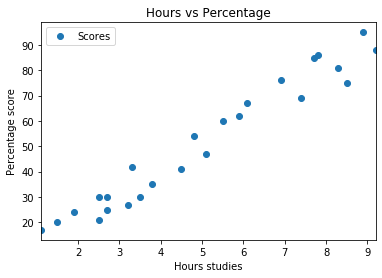

In [5]:
data.plot(x='Hours' , y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studies')
plt.ylabel('Percentage score')
plt.show()

In Graph you can clearly see how score are effect based on number of hours studies.
As you can see when student studies 9hours/day,
the predicted score is above 90

#### Dividing data

Now i am dividing the actual data into two part x and  y , attribute and labels respectively
and then split the (x and y)data into train and test

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(' x values ')
print(x)
print(' y values')
print(y)

 x values 
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
 y values
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### now importing built-in train_test_split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size =0.2 ,random_state = 0)

In [9]:
regressor = LinearRegression()
regressor.fit (x_train, y_train)
print("Training complete...")

Training complete...


Ploting the regression line and test data 

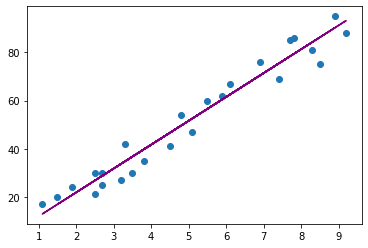

In [10]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line, color='purple');
plt.show()

### making predictions
Now that we have trained our algorithm, its time to make some predictions.

In [11]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual vs Predicted data side by side

In [12]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Q:- What will be predicted score if a student studies for 9.25 hours/day ?

In [15]:
new_hours = 9.25
own_pred = regressor.predict([[new_hours]])
print("No of Hours = {}".format(new_hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
